<h1 align=center> EE5111 MINI PROJECT 1 </h1>

<h3 align=center> IMPORTS, VARIABLE AND UTILITY FUNCTION DEFINITIONS </h3>

In [ ]:
import numpy as np
from math import *
import matplotlib.pyplot as plt 
from numpy.linalg import norm
plt.style.use('ggplot') 

In [ ]:
l = 32

F = np.zeros([512,l],dtype=complex)
F[:,:] = [[cos(2*np.pi*(i)*(j)/512)+1j*sin(2*np.pi*(i)*(j)/512) for j in range(l)] for i in range(512)]

In [ ]:
P = np.exp(-0.2*np.arange(l))
normp = np.linalg.norm(P,2)
normp

1.7416189042441914

In [ ]:
def get_h(): #generates a h matrix (32,1)
  h = np.array((np.random.normal(0,sqrt(0.5),l)+1j*np.random.normal(0,sqrt(0.5),l))*P[:]).reshape(32,1)/normp
  return h

In [ ]:
def get_H():#generates a H matrix (512,32)
  v = np.random.choice([complex(1,1), complex(-1,1), complex(1,-1), complex(-1,-1)],512)
  X = np.diag(v)
  return np.matmul(X,F)

In [ ]:
def get_n(variance):#generates a noise matrix (512,1)
  n = np.random.normal(0,sqrt(variance/2),(512,1)) + 1j*np.random.normal(0,sqrt(variance/2),(512,1))
  return n

In [ ]:
def estimate(H,y): #gets the least sq estimate
  H_h = np.conj(H).swapaxes(0,1) #hermitian of H
  h_est = np.linalg.pinv(np.matmul(H_h,H))
  h_est = np.matmul(h_est,np.matmul(H_h,y))
  return h_est

In [ ]:
def compare(h_est,h,Title="Plot showing h_hat and h averaged over 10000 trials"): #compares two vectors
  norm_h = [norm(a) for a in h]
  norm_h_est = [norm(a) for a in h_est]
  plt.stem(np.arange(0,l),norm_h,linefmt='k', markerfmt='D',label="h", use_line_collection=True)
  plt.stem(np.arange(0,l),norm_h_est,linefmt='r', markerfmt='o',label="h_est",use_line_collection=True)
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title(Title)
  plt.figure(figsize=(40,20))
  plt.show()  

In [ ]:
def constrained_est(H,y,A,b,return_hest=False): #solves a constrained least sq
  h_est = estimate(H,y)
  A_t=np.transpose(A)
  H_h = np.conj(H).swapaxes(0,1) #hermitian of H
  h1 = np.matmul(np.linalg.pinv(np.matmul(H_h,H)),A_t)
  h2 = np.linalg.pinv(np.matmul(A,h1))
  h3 = np.matmul(A,h_est)-b
  h2 = np.matmul(h2,h3)
  h_sparse=h_est-np.matmul(h1,h2)
  if return_hest==True:
    return h_sparse,h_est
  else:
    return h_sparse

In [ ]:
def Sparse(k=6):  #generate A,h, and sparsity points for a "sparse h problem"
  A=np.zeros((32-k,32))
  zero_index = np.random.choice(np.arange(l),32-k,replace=False)
  i=0
  for j in zero_index:
    A[i][j]=1
    i=i+1
  sparsity_points=list(set(range(l))-set(zero_index.tolist()))
  h = get_h()
  h[zero_index] = np.zeros((32-k,1))
  h = h.reshape(32,1)
  return A,h,sparsity_points

In [ ]:
def theo_error(B,variance): #calculates theoretical MSE
  C = np.matmul(np.conj(B).swapaxes(0,1),B)
  return np.abs(np.diag((np.linalg.pinv(C))*variance))

In [ ]:
def theo_error_constr(B,C,variance): #calculates theoretical MSE for constrained problem
  N = np.linalg.pinv(np.matmul(np.conj(B).swapaxes(0,1),B))
  temp1 = np.matmul(N,np.transpose(C))
  temp3 = np.matmul(C,N)
  temp2 = np.linalg.pinv(np.matmul(temp3,np.transpose(C))) 
  temp = np.matmul(np.matmul(temp1,temp2),temp3)
  return np.abs(np.diag(N-temp)*variance)

In [ ]:
def theo_error_reg(B,variance,alpha): #calculates theoretical MSE for regularization
  C = np.add(np.matmul(np.conj(B).swapaxes(0,1),B),alpha*np.identity(l))
  D = np.matmul(np.linalg.pinv(C),np.conj(B).swapaxes(0,1))
  return np.abs(variance*np.diag(np.matmul(D,np.conj(D).swapaxes(0,1))))

<h2 align=center> QUESTION 1 </h2>

In [ ]:
h = get_h()
H = get_H()
variance=0.1
n = get_n(variance)
y = np.add(np.matmul(H,h),n)
h_est = estimate(H,y)

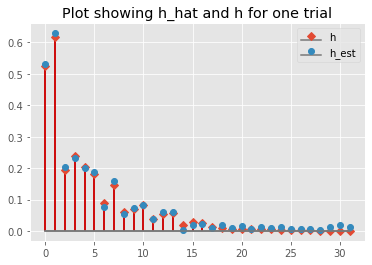

<Figure size 2880x1440 with 0 Axes>

In [ ]:
compare(h_est,h,"Plot showing h_hat and h for one trial")

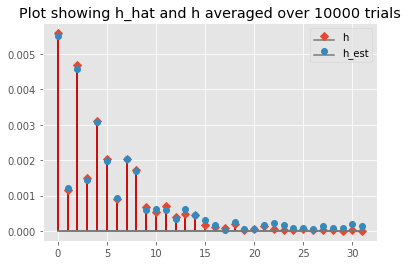

<Figure size 2880x1440 with 0 Axes>

Theoretical MSE: 0.0031250000000004963
Simulated MSE: 0.003126024549293055


In [ ]:
#Variance=0.1 1)
h_list = []
h_est_list = []
theo_mse_list = []
simu_mse_list = []
variance=0.1
for i in range(10000):
  h = get_h()
  H = get_H()  
  n = get_n(variance)
  y = np.add(np.matmul(H,h),n)
  h_est = estimate(H,y)
  h_list.append(h)
  h_est_list.append(h_est)
  theo_mse_list.append(sum(theo_error(H,variance)))
  simu_mse_list.append(np.linalg.norm(h-h_est,2)**2)
  
h_avg=sum(h_list)/10000
h_est_avg=sum(h_est_list)/10000
theo_mse_avg=sum(theo_mse_list)/10000
simu_mse_avg=sum(simu_mse_list)/10000
compare(h_est_avg,h_avg)
print("Theoretical MSE:",theo_mse_avg)
print("Simulated MSE:",simu_mse_avg)

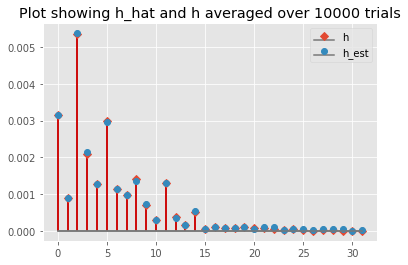

<Figure size 2880x1440 with 0 Axes>

Theoretical MSE: 0.00031250000000004457
Simulated MSE: 0.0003125556132843401


In [ ]:
#Variance=0.01 1)
h_list = []
h_est_list = []
theo_mse_list = []
simu_mse_list = []
for i in range(10000):
  h = get_h()
  H = get_H()
  variance=0.01
  n = get_n(variance)
  y = np.add(np.matmul(H,h),n)
  h_est = estimate(H,y)
  h_list.append(h)
  h_est_list.append(h_est)
  theo_mse_list.append(sum(theo_error(H,variance)))
  simu_mse_list.append(np.linalg.norm(h-h_est,2)**2)
  
h_avg=sum(h_list)/10000
h_est_avg=sum(h_est_list)/10000
theo_mse_avg=sum(theo_mse_list)/10000
simu_mse_avg=sum(simu_mse_list)/10000
compare(h_est_avg,h_avg)
print("Theoretical MSE:",theo_mse_avg)
print("Simulated MSE:",simu_mse_avg)

<h2 align=center> QUESTION 2 </h2>

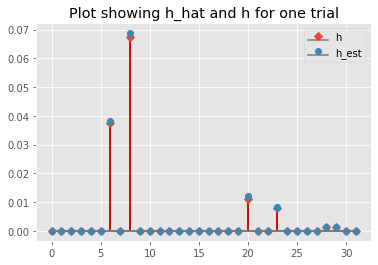

<Figure size 2880x1440 with 0 Axes>

In [ ]:
A,h,sparsity_points = Sparse()
b = np.zeros((26,1))
y = np.add(np.matmul(H,h),n)
h_sparse = constrained_est(H,y,A,b)
P1 = np.exp(-0.2*np.arange(6))
normp1 = np.linalg.norm(P1,2)
compare(h_sparse,h,"Plot showing h_hat and h for one trial")

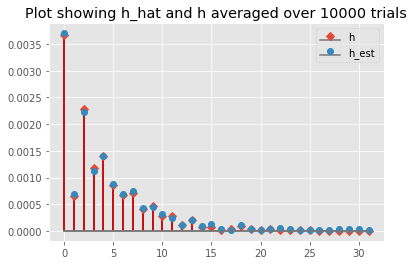

<Figure size 2880x1440 with 0 Axes>

Theoretical MSE: 0.00058593750000007
Simulated MSE: 0.0005868700588340446


In [ ]:
#Variance=0.1 2)
h_list = []
h_sparse_list = []
theo_mse_list = []
simu_mse_list = []
for i in range(10000):
  H = get_H()
  variance=0.1
  n = get_n(variance)
  A,h,_ = Sparse()
  b = np.zeros((26,1))
  y = np.add(np.matmul(H,h),n)  
  h_sparse = constrained_est(H,y,A,b)
  h_list.append(h)
  h_sparse_list.append(h_sparse)
  theo_mse_list.append(sum(theo_error_constr(H,A,variance)))
  simu_mse_list.append(np.linalg.norm(h-h_sparse,2)**2)
  
h_avg=sum(h_list)/10000
h_sparse_avg=sum(h_sparse_list)/10000
theo_mse_avg=sum(theo_mse_list)/10000
simu_mse_avg=sum(simu_mse_list)/10000
compare(h_sparse_avg,h_avg)
print("Theoretical MSE:",theo_mse_avg)
print("Simulated MSE:",simu_mse_avg)

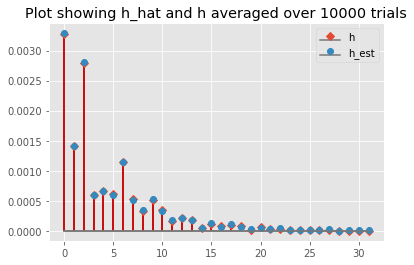

<Figure size 2880x1440 with 0 Axes>

Theoretical MSE: 5.859374999999394e-05
Simulated MSE: 5.810594060772514e-05


In [ ]:
#Variance=0.01 2)
h_list = []
h_sparse_list = []
theo_mse_list = []
simu_mse_list = []
for i in range(10000):
  H = get_H()
  variance=0.01
  n = get_n(variance)
  A,h,_ = Sparse()
  b = np.zeros((26,1))
  y = np.add(np.matmul(H,h),n)  
  h_sparse = constrained_est(H,y,A,b)
  h_list.append(h)
  h_sparse_list.append(h_sparse)
  theo_mse_list.append(sum(theo_error_constr(H,A,variance)))
  simu_mse_list.append(np.linalg.norm(h-h_sparse,2)**2)
  
h_avg=sum(h_list)/10000
h_sparse_avg=sum(h_sparse_list)/10000
theo_mse_avg=sum(theo_mse_list)/10000
simu_mse_avg=sum(simu_mse_list)/10000
compare(h_sparse_avg,h_avg)
print("Theoretical MSE:",theo_mse_avg)
print("Simulated MSE:",simu_mse_avg)


<h2 align=center> QUESTION 3 PART (a) </h2>

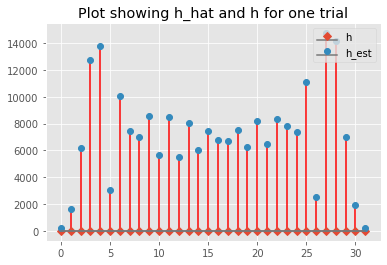

<Figure size 2880x1440 with 0 Axes>

In [ ]:
v = np.random.choice([complex(1,1), complex(-1,1), complex(1,-1), complex(-1,-1)],512)
X1 = np.diag(v)
for i in range (180):
  X1[i][i]=0
  X1[511-i][511-i]=0

h=get_h()      
H = np.matmul(X1,F)
y = np.add(np.matmul(H,h),n)
h_est = estimate(H,y)
compare(h_est,h,"Plot showing h_hat and h for one trial")

In [ ]:
#corrected pseudo inverse

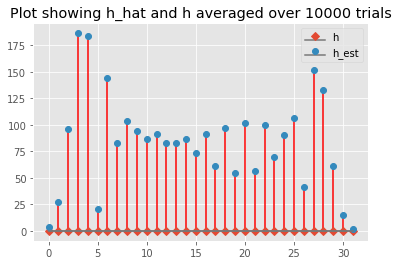

<Figure size 2880x1440 with 0 Axes>

Theoretical MSE: 5008387327.165815
Simulated MSE: 5017894773.214289


In [ ]:
#Variance=0.1 3a 1)
h_list = []
h_est_list = []
theo_mse_list = []
simu_mse_list = []
variance=0.1
for i in range(10000):
  v = np.random.choice([complex(1,1), complex(-1,1), complex(1,-1), complex(-1,-1)],512)
  X1 = np.diag(v)
  n = get_n(variance)
  for i in range (180):
    X1[i][i]=0
    X1[511-i][511-i]=0
  h=get_h()      
  H = np.matmul(X1,F)
  y = np.add(np.matmul(H,h),n)
  h_est = estimate(H,y)
  h_list.append(h)
  h_est_list.append(h_est)
  theo_mse_list.append(sum(theo_error(H,variance)))
  simu_mse_list.append(np.linalg.norm(h-h_est,2)**2)
  
h_avg=sum(h_list)/10000
h_est_avg=sum(h_est_list)/10000
theo_mse_avg=sum(theo_mse_list)/10000
simu_mse_avg=sum(simu_mse_list)/10000
compare(h_est_avg,h_avg)
print("Theoretical MSE:",theo_mse_avg)
print("Simulated MSE:",simu_mse_avg)

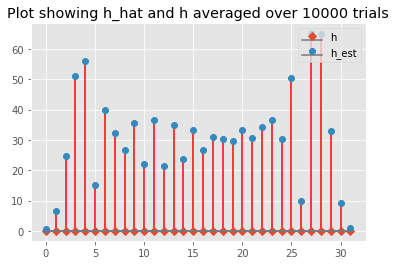

<Figure size 2880x1440 with 0 Axes>

Theoretical MSE: 500840019.0892342
Simulated MSE: 500682802.15400183


In [ ]:
#Variance=0.01 3a 1)
h_list = []
h_est_list = []
theo_mse_list = []
simu_mse_list = []
variance=0.01
for i in range(10000):
  v = np.random.choice([complex(1,1), complex(-1,1), complex(1,-1), complex(-1,-1)],512)
  X1 = np.diag(v)
  n = get_n(variance)
  for i in range (180):
    X1[i][i]=0
    X1[511-i][511-i]=0
  h=get_h()      
  H = np.matmul(X1,F)
  y = np.add(np.matmul(H,h),n)
  h_est = estimate(H,y)
  h_list.append(h)
  h_est_list.append(h_est)
  theo_mse_list.append(sum(theo_error(H,variance)))
  simu_mse_list.append(np.linalg.norm(h-h_est,2)**2)
  
h_avg=sum(h_list)/10000
h_est_avg=sum(h_est_list)/10000
theo_mse_avg=sum(theo_mse_list)/10000
simu_mse_avg=sum(simu_mse_list)/10000
compare(h_est_avg,h_avg)
print("Theoretical MSE:",theo_mse_avg)
print("Simulated MSE:",simu_mse_avg)

<h2 align=center> QUESTION 3 PART (a) for Q2 </h2>

In [ ]:
A,h,_ = Sparse()
y = np.add(np.matmul(H,h),n)
h_sparse,h_est = constrained_est(H,y,A,b,True)

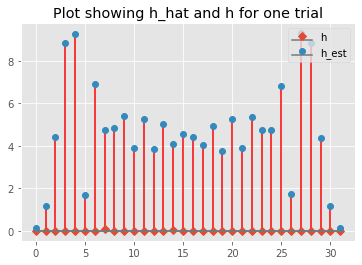

<Figure size 2880x1440 with 0 Axes>

In [ ]:
compare(h_sparse,h,"Plot showing h_hat and h for one trial")

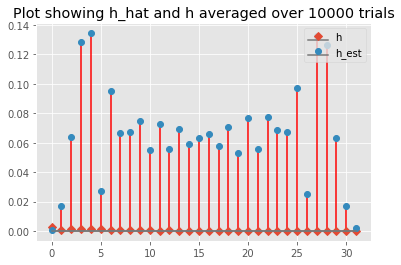

<Figure size 2880x1440 with 0 Axes>

Theoretical MSE: 7125864.135083488
Simulated MSE: 22791.790260683207


In [ ]:
#Variance=0.1 3a 2)
h_list = []
h_sparse_list = []
theo_mse_list = []
simu_mse_list = []
b = np.zeros((26,1))
for i in range(10000):
  v = np.random.choice([complex(1,1), complex(-1,1), complex(1,-1), complex(-1,-1)],512)
  X1 = np.diag(v)
  for i in range (180):
    X1[i][i]=0
    X1[511-i][511-i]=0      
  H = np.matmul(X1,F)
  variance=0.1
  n = get_n(variance)
  A,h,_ = Sparse()
  y = np.add(np.matmul(H,h),n)  
  h_sparse = constrained_est(H,y,A,b)
  h_list.append(h)
  h_sparse_list.append(h_sparse)
  theo_mse_list.append(sum(theo_error_constr(H,A,variance)))
  simu_mse_list.append(np.linalg.norm(h-h_sparse,2)**2)
  
h_avg=sum(h_list)/10000
h_sparse_avg=sum(h_sparse_list)/10000
theo_mse_avg=sum(theo_mse_list)/10000
simu_mse_avg=sum(simu_mse_list)/10000
compare(h_sparse_avg,h_avg)
print("Theoretical MSE:",theo_mse_avg)
print("Simulated MSE:",simu_mse_avg)

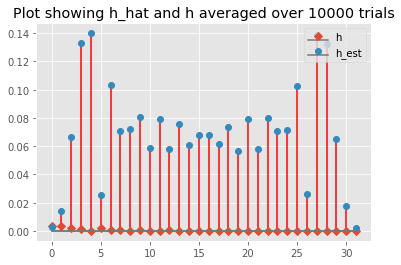

<Figure size 2880x1440 with 0 Axes>

Theoretical MSE: 706020.0835244311
Simulated MSE: 2167.956518071886


In [ ]:
#Variance=0.01 3a 2)
h_list = []
h_sparse_list = []
theo_mse_list = []
simu_mse_list = []
b = np.zeros((26,1))
for i in range(10000):
  v = np.random.choice([complex(1,1), complex(-1,1), complex(1,-1), complex(-1,-1)],512)
  X1 = np.diag(v)
  for i in range (180):
    X1[i][i]=0
    X1[511-i][511-i]=0      
  H = np.matmul(X1,F)
  variance=0.01
  n = get_n(variance)
  A,h,_ = Sparse()
  y = np.add(np.matmul(H,h),n)  
  h_sparse = constrained_est(H,y,A,b)
  h_list.append(h)
  h_sparse_list.append(h_sparse)
  theo_mse_list.append(sum(theo_error_constr(H,A,variance)))
  simu_mse_list.append(np.linalg.norm(h-h_sparse,2)**2)
  
h_avg=sum(h_list)/10000
h_sparse_avg=sum(h_sparse_list)/10000
theo_mse_avg=sum(theo_mse_list)/10000
simu_mse_avg=sum(simu_mse_list)/10000
compare(h_sparse_avg,h_avg)
print("Theoretical MSE:",theo_mse_avg)
print("Simulated MSE:",simu_mse_avg)

<h2 align=center> QUESTION 3 PART (b) </h2>

In [ ]:
def regularization(H_reg,y_reg,alpha,l=32):
  H_h = np.conj(H_reg).swapaxes(0,1) #hermitian of H_reg
  h_est = np.matmul(H_h,H_reg)
  h_est = np.linalg.inv(np.add(h_est,alpha*np.identity(l)))
  h_est = np.matmul(h_est,np.matmul(H_h,y_reg))
  return h_est

In [ ]:
v = np.random.choice([complex(1,1), complex(-1,1), complex(1,-1), complex(-1,-1)],512)
X1 = np.diag(v)
for i in range (180):
  X1[i][i]=0
  X1[511-i][511-i]=0    
H = np.matmul(X1,F)
h = get_h()
n = get_n(0.1)
y = np.add(np.matmul(H,h),n)

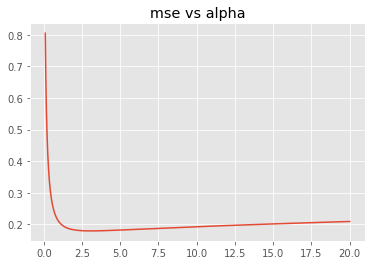

In [ ]:
mse=[]
start=0.1;end=20
for alpha in np.linspace(start, end, num=10000):
  h_est_reg = regularization(H,y,alpha)
  mse.append(np.linalg.norm(np.subtract(h_est_reg, h),2)**2)
plt.plot(np.linspace(start, end, num=10000),mse)
plt.title("mse vs alpha")
plt.show()

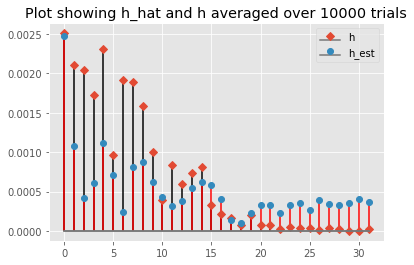

<Figure size 2880x1440 with 0 Axes>

alphas used for regularization: [  0.2   1.    5.   25.  125. ]
Theoretical MSE: 0.19505502455308968 0.041185367854951735 0.009824136206607747 0.002891248244002117 0.001162106296807963
Simulated MSE: 0.549195789853743 0.4333230112839152 0.44547619298578095 0.49078594477248116 0.5610020988395333


In [ ]:
#Variance=0.1 3b
h_list = []
h_est_list0 = [];h_est_list1 = [];h_est_list2 = [];
h_est_list3 = [];h_est_list4 = [];
theo_mse_list0 = [];theo_mse_list1 = [];theo_mse_list2 = [];
theo_mse_list3 = [];theo_mse_list4 = []
simu_mse_list0 = [];simu_mse_list1 = [];simu_mse_list2 = [];
simu_mse_list3 = [];simu_mse_list4 = []
variance=0.1
start=0.2;end=125
for i in range(10000):
  v = np.random.choice([complex(1,1), complex(-1,1), complex(1,-1), complex(-1,-1)],512)
  X1 = np.diag(v)
  n = get_n(0.1)
  for i in range (180):
    X1[i][i]=0
    X1[511-i][511-i]=0
  h=get_h()      
  H = np.matmul(X1,F)
  y = np.add(np.matmul(H,h),n)
  mse=[];h_regs=[]
  for alpha in np.geomspace(start, end, num=5):
    h_est_reg = regularization(H,y,alpha)
    mse.append(np.linalg.norm(np.subtract(h_est_reg, h),2)**2)
    h_regs.append(h_est_reg) 
  h_est_list0.append(h_regs[0]);h_est_list1.append(h_regs[1]);h_est_list2.append(h_regs[2]);
  h_est_list3.append(h_regs[3]);h_est_list4.append(h_regs[4])
  h_list.append(h)
  theo_mse_list0.append(sum(theo_error_reg(H,variance,0.2)));theo_mse_list1.append(sum(theo_error_reg(H,variance,1)));theo_mse_list2.append(sum(theo_error_reg(H,variance,5)));
  theo_mse_list3.append(sum(theo_error_reg(H,variance,25)));theo_mse_list4.append(sum(theo_error_reg(H,variance,125)));
  simu_mse_list0.append(np.linalg.norm(h-h_regs[0],2)**2);simu_mse_list1.append(np.linalg.norm(h-h_regs[1],2)**2);simu_mse_list2.append(np.linalg.norm(h-h_regs[2],2)**2)
  simu_mse_list3.append(np.linalg.norm(h-h_regs[3],2)**2);simu_mse_list4.append(np.linalg.norm(h-h_regs[4],2)**2)
  
h_avg=sum(h_list)/10000
h_est_avg0=sum(h_est_list0)/10000;h_est_avg1=sum(h_est_list1)/10000;h_est_avg2=sum(h_est_list2)/10000
h_est_avg3=sum(h_est_list3)/10000;h_est_avg4=sum(h_est_list4)/10000
theo_mse_avg0=sum(theo_mse_list0)/10000;theo_mse_avg1=sum(theo_mse_list1)/10000;theo_mse_avg2=sum(theo_mse_list2)/10000;
theo_mse_avg3=sum(theo_mse_list3)/10000;theo_mse_avg4=sum(theo_mse_list4)/10000
simu_mse_avg0=sum(simu_mse_list0)/10000;simu_mse_avg1=sum(simu_mse_list1)/10000;simu_mse_avg2=sum(simu_mse_list2)/10000
simu_mse_avg3=sum(simu_mse_list3)/10000;simu_mse_avg4=sum(simu_mse_list4)/10000
compare(h_est_avg1,h_avg,"Plot showing h_hat and h averaged over 10000 trials")
print("alphas used for regularization:",np.geomspace(start, end, num=5))
print("Theoretical MSE:",theo_mse_avg0,theo_mse_avg1,theo_mse_avg2,theo_mse_avg3,theo_mse_avg4)
print("Simulated MSE:",simu_mse_avg0,simu_mse_avg1,simu_mse_avg2,simu_mse_avg3,simu_mse_avg4)

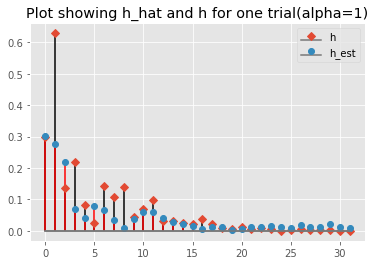

<Figure size 2880x1440 with 0 Axes>

In [ ]:
compare(h_est_list1[1],h_list[1],"Plot showing h_hat and h for one trial(alpha=1)")

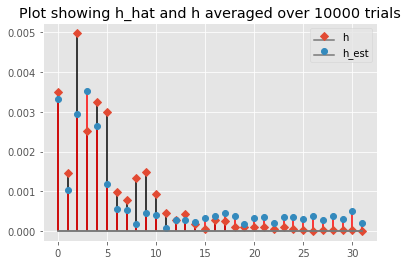

<Figure size 2880x1440 with 0 Axes>

alphas used for regularization: [  0.2   1.    5.   25.  125. ]
Theoretical MSE: 0.019505502455307612 0.00411853678549572 0.0009824136206610387 0.0002891248244002485 0.00011621062968079057
Simulated MSE: 0.5515350022502906 0.43574907190540263 0.4481070999001303 0.4938715205525858 0.5638469034745245


In [ ]:
#Variance=0.01 3b
h_list = []
h_est_list0 = [];h_est_list1 = [];h_est_list2 = [];
h_est_list3 = [];h_est_list4 = [];
theo_mse_list0 = [];theo_mse_list1 = [];theo_mse_list2 = [];
theo_mse_list3 = [];theo_mse_list4 = []
simu_mse_list0 = [];simu_mse_list1 = [];simu_mse_list2 = [];
simu_mse_list3 = [];simu_mse_list4 = []
variance=0.01
start=0.2;end=125
for i in range(10000):
  v = np.random.choice([complex(1,1), complex(-1,1), complex(1,-1), complex(-1,-1)],512)
  X1 = np.diag(v)
  n = get_n(0.1)
  for i in range (180):
    X1[i][i]=0
    X1[511-i][511-i]=0
  h=get_h()      
  H = np.matmul(X1,F)
  y = np.add(np.matmul(H,h),n)
  mse=[];h_regs=[]
  for alpha in np.geomspace(start, end, num=5):
    h_est_reg = regularization(H,y,alpha)
    mse.append(np.linalg.norm(np.subtract(h_est_reg, h),2)**2)
    h_regs.append(h_est_reg) 
  h_est_list0.append(h_regs[0]);h_est_list1.append(h_regs[1]);h_est_list2.append(h_regs[2]);
  h_est_list3.append(h_regs[3]);h_est_list4.append(h_regs[4])
  h_list.append(h)
  theo_mse_list0.append(sum(theo_error_reg(H,variance,0.2)));theo_mse_list1.append(sum(theo_error_reg(H,variance,1)));theo_mse_list2.append(sum(theo_error_reg(H,variance,5)));
  theo_mse_list3.append(sum(theo_error_reg(H,variance,25)));theo_mse_list4.append(sum(theo_error_reg(H,variance,125)));
  simu_mse_list0.append(np.linalg.norm(h-h_regs[0],2)**2);simu_mse_list1.append(np.linalg.norm(h-h_regs[1],2)**2);simu_mse_list2.append(np.linalg.norm(h-h_regs[2],2)**2)
  simu_mse_list3.append(np.linalg.norm(h-h_regs[3],2)**2);simu_mse_list4.append(np.linalg.norm(h-h_regs[4],2)**2)
  
h_avg=sum(h_list)/10000
h_est_avg0=sum(h_est_list0)/10000;h_est_avg1=sum(h_est_list1)/10000;h_est_avg2=sum(h_est_list2)/10000
h_est_avg3=sum(h_est_list3)/10000;h_est_avg4=sum(h_est_list4)/10000
theo_mse_avg0=sum(theo_mse_list0)/10000;theo_mse_avg1=sum(theo_mse_list1)/10000;theo_mse_avg2=sum(theo_mse_list2)/10000;
theo_mse_avg3=sum(theo_mse_list3)/10000;theo_mse_avg4=sum(theo_mse_list4)/10000
simu_mse_avg0=sum(simu_mse_list0)/10000;simu_mse_avg1=sum(simu_mse_list1)/10000;simu_mse_avg2=sum(simu_mse_list2)/10000
simu_mse_avg3=sum(simu_mse_list3)/10000;simu_mse_avg4=sum(simu_mse_list4)/10000
compare(h_est_avg1,h_avg,"Plot showing h_hat and h averaged over 10000 trials")
print("alphas used for regularization:",np.geomspace(start, end, num=5))
print("Theoretical MSE:",theo_mse_avg0,theo_mse_avg1,theo_mse_avg2,theo_mse_avg3,theo_mse_avg4)
print("Simulated MSE:",simu_mse_avg0,simu_mse_avg1,simu_mse_avg2,simu_mse_avg3,simu_mse_avg4)

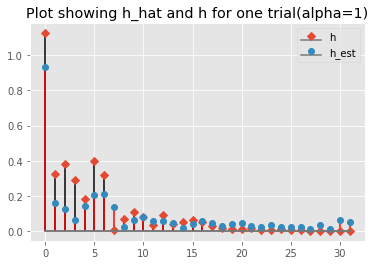

<Figure size 2880x1440 with 0 Axes>

In [ ]:
compare(h_est_list1[1],h_list[1],"Plot showing h_hat and h for one trial(alpha=1)")

<h2 align=center> QUESTION 4 </h2>

In [ ]:
A=np.zeros((3,l))
A[0][0]=1;A[0][1]=-1
A[1][2]=1;A[1][3]=-1
A[2][4]=1;A[2][5]=-1
h = get_h()
h[0]=h[1]
h[2]=h[3]
h[4]=h[5]
H = get_H()
y = np.add(np.matmul(H,h),n)
b = np.zeros((3,1))
h_constr,h_est = constrained_est(H,y,A,b,True)

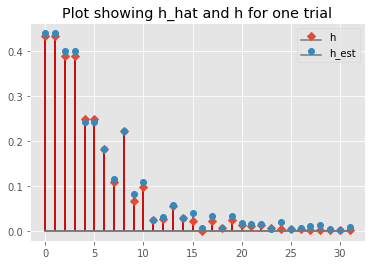

<Figure size 2880x1440 with 0 Axes>

In [ ]:
compare(h_constr,h,"Plot showing h_hat and h for one trial")

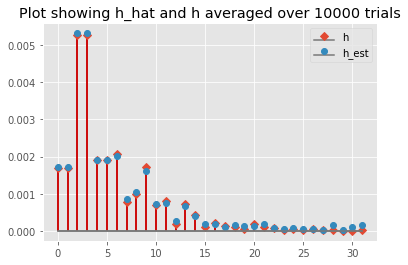

<Figure size 2880x1440 with 0 Axes>

Theoretical MSE: 0.002832031250000477
Simulated MSE: 0.002838210145692604


In [ ]:
#Variance=0.1 4)
h_list = []
h_constr_list = []
theo_mse_list = []
simu_mse_list = []
b = np.zeros((3,1))
for i in range(10000):
  H = get_H()
  h = get_h()
  variance=0.1
  n = get_n(variance)
  h[0]=h[1]
  h[2]=h[3]
  h[4]=h[5]
  y = np.add(np.matmul(H,h),n)  
  h_constr,h_est = constrained_est(H,y,A,b,True)
  h_list.append(h)
  h_constr_list.append(h_constr)
  theo_mse_list.append(sum(theo_error_constr(H,A,variance)))
  simu_mse_list.append(np.linalg.norm(h-h_constr,2)**2)
  
h_avg=sum(h_list)/10000
h_constr_avg=sum(h_constr_list)/10000
theo_mse_avg=sum(theo_mse_list)/10000
simu_mse_avg=sum(simu_mse_list)/10000
compare(h_constr_avg,h_avg)
print("Theoretical MSE:",theo_mse_avg)
print("Simulated MSE:",simu_mse_avg)

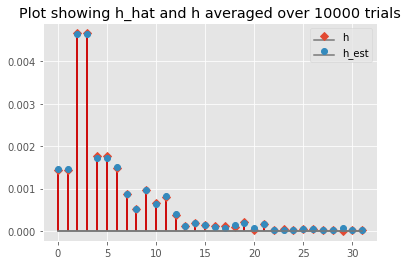

<Figure size 2880x1440 with 0 Axes>

Theoretical MSE: 0.0002832031249999723
Simulated MSE: 0.0002836711134153703


In [ ]:
#Variance=0.01 4)
h_list = []
h_constr_list = []
theo_mse_list = []
simu_mse_list = []
b = np.zeros((3,1))
for i in range(10000):
  H = get_H()
  h = get_h()
  variance=0.01
  n = get_n(variance)
  h[0]=h[1]
  h[2]=h[3]
  h[4]=h[5]
  y = np.add(np.matmul(H,h),n)
  h_constr,h_est = constrained_est(H,y,A,b,True)
  h_list.append(h)
  h_constr_list.append(h_constr)
  theo_mse_list.append(sum(theo_error_constr(H,A,variance)))
  simu_mse_list.append(np.linalg.norm(h-h_constr,2)**2)
  
h_avg=sum(h_list)/10000
h_constr_avg=sum(h_constr_list)/10000
theo_mse_avg=sum(theo_mse_list)/10000
simu_mse_avg=sum(simu_mse_list)/10000
compare(h_constr_avg,h_avg)
print("Theoretical MSE:",theo_mse_avg)
print("Simulated MSE:",simu_mse_avg)

<h2 align=center> QUESTION 5 </h2>

In [ ]:
def support_estimate(A,k,y):
  S_omp=[];r=y;
  for i in range(k):
      t=np.asarray([np.abs(np.matmul(np.conj(A[:,j]),r)) for j in range(A.shape[1])]).reshape(l)
      t = int(np.where(t == np.max(t))[0])
      S_omp.append(t)
      P=A[:,S_omp] @ np.linalg.inv(np.conj(A[:,S_omp]).swapaxes(0,1) \
                                           @ A[:,S_omp]) @ np.conj(A[:,S_omp].swapaxes(0,1))
      r=(np.eye(512)-P) @ y
  return S_omp

In [ ]:
A,h,sparsity_points = Sparse(10)
H=get_H()
n=get_n(0.1)
y = np.add(np.matmul(H,h),n)
s = support_estimate(H,10,y)
s.sort()
sparsity_points.sort()
s,sparsity_points

([0, 1, 3, 7, 8, 11, 14, 18, 19, 21], [0, 1, 3, 7, 8, 9, 14, 16, 19, 29])

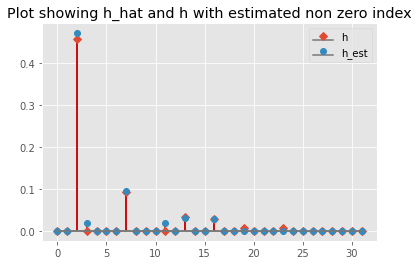

<Figure size 2880x1440 with 0 Axes>

In [ ]:
_,h,sparsity_points = Sparse()
H=get_H()
b = np.zeros((26,1))
y = np.add(np.matmul(H,h),n)
s = support_estimate(H,6,y)
zero_index = list(set(range(l))-set(s))
A=np.zeros((32-6,32))
i=0
for j in zero_index:
  A[i][j]=1
  i=i+1
h_sparse = constrained_est(H,y,A,b)
compare(h_sparse,h,"Plot showing h_hat and h with estimated non zero index")

In [ ]:
print("mse =",np.linalg.norm(h-h_sparse,2)**2)

mse = 0.0012375228413836416


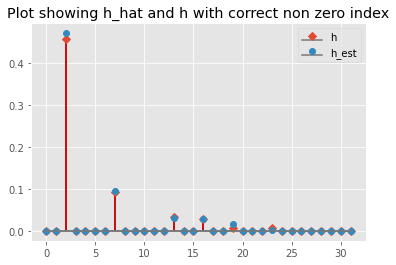

<Figure size 2880x1440 with 0 Axes>

In [ ]:
A=np.zeros((32-6,32))
i=0
zero_index = list(set(range(l))-set(sparsity_points))
for j in zero_index:
  A[i][j]=1
  i=i+1
h_sparse = constrained_est(H,y,A,b)
compare(h_sparse,h,"Plot showing h_hat and h with correct non zero index")

In [ ]:
print("mse =",np.linalg.norm(h-h_sparse,2)**2)

mse = 0.0006428167576833757


In [ ]:
#MSE vs alpha for estimated zero taps

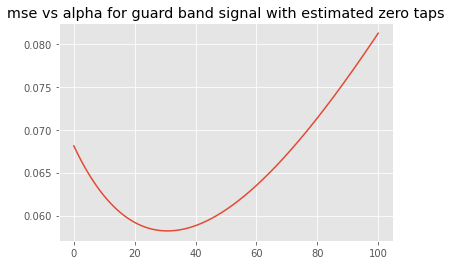

0.05821780074244604


In [ ]:
_,h,sparsity_points = Sparse()
v = np.random.choice([complex(1,1), complex(-1,1), complex(1,-1), complex(-1,-1)],512)
X1 = np.diag(v)
for i in range (180):
  X1[i][i]=0
  X1[511-i][511-i]=0     
H = np.matmul(X1,F)
n=get_n(0.1)
y = np.add(np.matmul(H,h),n)  
s = support_estimate(H,6,y)
zero_index = list(set(range(l))-set(s))
H1 = np.delete(H,zero_index,1)
h1 = np.delete(h,zero_index,0)
y1 = np.add(np.matmul(H,h),n) 
start=0.001;end=100
mse=[]
for alpha in np.linspace(start, end, num=10000):
  h_est_reg = regularization(H1,y1,alpha,6)
  mse.append(np.linalg.norm(np.subtract(h_est_reg, h1),2)**2)

plt.plot(np.linspace(start, end, num=10000),mse)
plt.title("mse vs alpha for guard band signal with estimated zero taps")
plt.show()
print(min(mse))


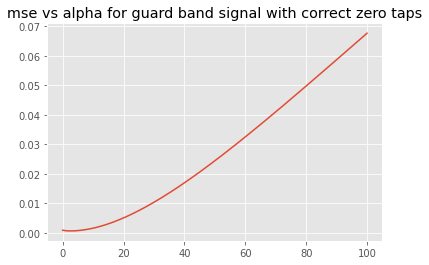

0.0006394906591522158


In [ ]:
zero_index = list(set(range(l))-set(sparsity_points))
H1 = np.delete(H,zero_index,1)
h1 = np.delete(h,zero_index,0)
y1 = np.add(np.matmul(H,h),n) 
start=0.001;end=100
mse=[]
for alpha in np.linspace(start, end, num=10000):
  h_est_reg = regularization(H1,y1,alpha,6)
  mse.append(np.linalg.norm(np.subtract(h_est_reg, h1),2)**2)

plt.plot(np.linspace(start, end, num=10000),mse)
plt.title("mse vs alpha for guard band signal with correct zero taps")
plt.show()
print(min(mse))

In [ ]:
s,sparsity_points

([1, 4, 6, 13, 31, 16], [1, 3, 21, 23, 25, 26])

--------------------------------------------  THE PROGRAM ENDS HERE--------------------------------------